# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `6` | `Questions`

> Hi, Team. 👋

> Here we go again. The current notebook contains 10 questions that help you review our course content.

> Try to answer questions within a 120-minute time limit (and you may refer to lecture notes and review scripts while you are answering). This kind of timed task will improve your performance and prepare you well for the assessment down the line. Once you complete this, submit your script via eLearn.

> Enjoy!"🤞

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

> Let's set some print option.

In [2]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

## 👇 Questions 1 to 4 ask you to build, execute, and backtest a `mean-reversion` strategy.

### <font color = blue> 👉 Question 1</font>. Let’s take a look at Google (`GOOGL`) as our security of interest, over the period of August 2011 to July 2020.

### Use a simple moving average of 42 days.

### Set a threshold value at two standard deviations of the current price, to deviate from the simple moving average to signal a positioning.

### <font color = green> NOTE: Your moving threshold value here is NOT an absolute value. You should create two additional columns containing your two standard deviations relative to your base line (a simple moving average of 42 days). </font>

### Visualize your buy and sell positions.

### Below are the lines of code that lead to an answer:

In [3]:
google =\
(    yf
    .download('GOOGL',
              start = dt.datetime(2011, 8, 1),
              end = dt.datetime(2020, 7, 31)
             )
    .dropna()
)

[*********************100%%**********************]  1 of 1 completed


In [4]:
# 42 days sma
google["SMA_42"] =\
(
    google
    ["Close"]
    .rolling(window = 42)
    .mean()
)

# 42 days sd
google["STD_42"] =\
(
    google
    ["Close"]
    .rolling(window = 42)
    .std()
)

### <font color = red> Answer 1 is presented in the cell below: </font>

In [5]:
# 约95%的数据点会落在平均值的两倍标准差之内
google['Upper_Bound'] = google['SMA_42'] + 2 * google['STD_42']# 当价格高于这个，说明价格大幅上涨，可以卖出
google['Lower_Bound'] = google['SMA_42'] - 2 * google['STD_42']# 当价格低于这个，说明价格大幅下跌，可以买入

In [6]:
google['trading_positions'] = 0

google["trading_positions"] =\
(
    np
    .where((google["Close"] < google['Lower_Bound']) &# buy signal (short)
           (google['trading_positions']
            .shift(1) != 1),
            1, google['trading_positions'])# price > upper bound
)

google["trading_positions"] =\
(
    np
    .where((google["Close"] > google['Upper_Bound']) &# sell (short)
           (google['trading_positions']
            .shift(1) != -1),
           -1, google['trading_positions'])# prince < lower bound
)

google["trading_positions"] =\
(
    google["trading_positions"]
    .shift(1)# move forward one day
)

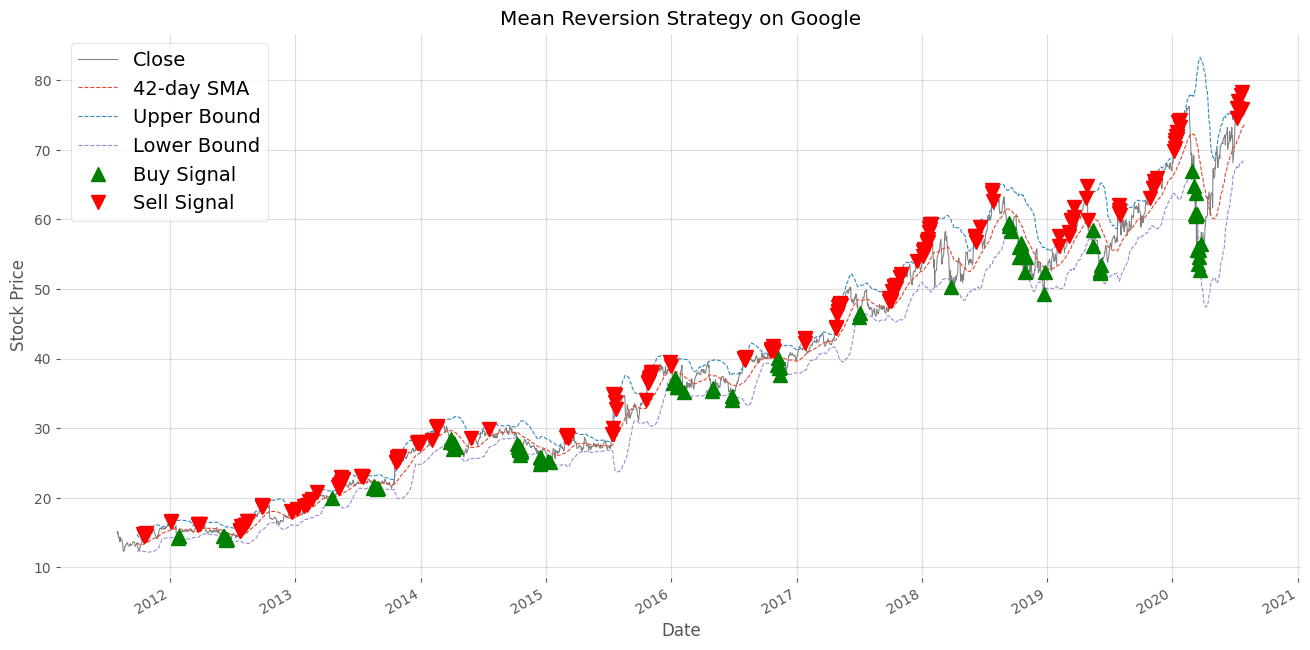

In [7]:
fig = \
(
    plt
    .figure(figsize=[16, 8]
           )
)

sub =\
(
    fig
    .add_subplot(111,# 111表示图表是1行1列的布局
                 ylabel = "Stock Price")# 添加子图，并且设置纵轴名字
)

# google close
(
    google['Close'].plot(ax=sub, 
                         color="grey", 
                         linewidth=0.75)
)
(
    google
    [['SMA_42', 'Upper_Bound', 'Lower_Bound']]
    .plot(ax=sub, 
          style=["--", "--", "--"],
          linewidth=0.80)
)

(
    sub
    .plot(google.loc[google['trading_positions'] == 1].index,  # 找到买入信号的日期
         google['Close'][google['trading_positions'] == 1],  # 对应的收盘价
         "^",
         color="green", 
         markersize=10)
)

(
    sub
    .plot(google.loc[google['trading_positions'] == -1].index,  # 找到卖出信号的日期
          google['Close'][google['trading_positions'] == -1],  # 对应的收盘价
          "v", 
          color="red",
          markersize=10)
)

sub.legend(["Close", "42-day SMA", "Upper Bound", "Lower Bound", "Buy Signal", "Sell Signal"])
plt.title('Mean Reversion Strategy on Google')
plt.show()

### <font color = blue> 👉 Question 2</font>. Let’s expand this strategy to two more securities, Apple (`AAPL`) and Amazon (`AMZN`) over the same period of August 2011 to July 2020. 

### When using the strategy above, which of those two securities has the greater Sharpe Ratio?

### Below are the lines of code that lead to an answer:

In [8]:
AAPL =\
(    yf
    .download('AAPL',
              start = dt.datetime(2011, 8, 1),
              end = dt.datetime(2020, 7, 31)
             )
    .dropna()
)

AMZN =\
(    yf
    .download('AMZN',
              start = dt.datetime(2011, 8, 1),
              end = dt.datetime(2020, 7, 31)
             )
    .dropna()
)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [9]:
# LOG RETURN
AAPL['Log Return'] = \
    np\
    .log(AAPL['Adj Close'] 
         /
         AAPL['Adj Close'].shift(1))


AMZN['Log Return'] = \
    np\
    .log(AMZN['Adj Close'] 
         /
         AMZN['Adj Close'].shift(1))

In [10]:
AAPL_annual_return = \
    AAPL['Log Return']\
    .mean()\
    * 252

AAPL_annual_sd = \
    AAPL['Log Return']\
    .std()\
    * np.sqrt(252)

AMZN_annual_return = \
    AMZN['Log Return']\
    .mean()\
    * 252

AMZN_annual_sd = \
    AMZN['Log Return']\
    .std()\
    * np.sqrt(252)


In [11]:
# SHARPE RATIO FOR BOTH 越高说明在风险调整后的表现越好
AAPL_sharpe_ratio = AAPL_annual_return / AAPL_annual_sd
AMZN_sharpe_ratio = AMZN_annual_return / AMZN_annual_sd
print('\nAAPL_Sharpe_ratio =', AAPL_sharpe_ratio)
print('\nAMZN_Sharpe_ratio =', AMZN_sharpe_ratio)


AAPL_Sharpe_ratio = 0.8157031474380426

AMZN_Sharpe_ratio = 0.9260377925580529


### <font color = red> Answer 2 </font>

    The answer is ____amzn________ .

### <font color = blue> 👉 Question 3</font>. Let’s suppose that you started from a `$200,000` capital base for each of the three securities.

### Disregarding commission, how much will you have in the end in your account for each of the securities as a result of the mean-reversion strategy-based trading?

### Below are the lines of code that lead to an answer:

In [12]:
AAPL =\
(    yf
    .download('AAPL',
              start = dt.datetime(2011, 8, 1),
              end = dt.datetime(2020, 7, 31)
             )
    .dropna()
)

AMZN =\
(    yf
    .download('AMZN',
              start = dt.datetime(2011, 8, 1),
              end = dt.datetime(2020, 7, 31)
             )
    .dropna()
)

GOOGL =\
(    yf
    .download('GOOGL',
              start = dt.datetime(2011, 8, 1),
              end = dt.datetime(2020, 7, 31)
             )
    .dropna()
)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [13]:
AAPL["SMA_42"] =\
(
    AAPL["Close"]
    .rolling(window = 42)
    .mean()
)

AMZN["SMA_42"] =\
(
    AMZN["Close"]
    .rolling(window = 42)
    .mean()
)

GOOGL["SMA_42"] =\
(
    GOOGL["Close"]
    .rolling(window = 42)
    .mean()
)

In [14]:
# BUY SELL SIGNAL
AAPL['signal'] = 0

AAPL.loc[AAPL['Close'] < AAPL['SMA_42'], 'signal'] = 1

AAPL.loc[AAPL['Close'] > AAPL['SMA_42'], 'signal'] = -1 

AMZN['signal'] = 0
AMZN.loc[AMZN['Close'] < AMZN['SMA_42'], 'signal'] = 1 
AMZN.loc[AMZN['Close'] > AMZN['SMA_42'], 'signal'] = -1 

GOOGL['signal'] = 0
GOOGL.loc[GOOGL['Close'] < GOOGL['SMA_42'], 'signal'] = 1 
GOOGL.loc[GOOGL['Close'] > GOOGL['SMA_42'], 'signal'] = -1


In [15]:
AAPL['returns'] = \
    AAPL['Close']\
    .pct_change()

AMZN['returns'] = \
    AMZN['Close']\
    .pct_change()

GOOGL['returns'] = \
    GOOGL['Close']\
    .pct_change()

In [16]:
AAPL['strategy_returns'] = \
    AAPL['signal']\
    .shift(1) \
    * AAPL['returns']


AMZN['strategy_returns'] = \
    AMZN['signal']\
    .shift(1) \
    * AMZN['returns']


GOOGL['strategy_returns'] = \
    GOOGL['signal']\
    .shift(1) \
    * GOOGL['returns']

In [17]:
CAP_BASE = 200000
AAPL['capital'] = \
    CAP_BASE * \
    (1 + AAPL['strategy_returns']).cumprod()

AMZN['capital'] = \
    CAP_BASE * \
    (1 + AMZN['strategy_returns']).cumprod()

GOOGL['capital'] = \
    CAP_BASE * \
    (1 + GOOGL['strategy_returns']).cumprod()

final_AAPL_cap = AAPL['capital'].iloc[-1]
print(final_AAPL_cap)
final_AMZN_cap = AMZN['capital'].iloc[-1]
print(final_AMZN_cap)
final_GOOGL_cap = GOOGL['capital'].iloc[-1]
print(final_GOOGL_cap)

74767.12650106111
96259.08159933213
100585.01332807263


### <font color = red> Answer 3 </font>

    GOOGL : ___74767.1265_________ 
    
    AAPL  : ____96259.0816________ 
     
    AMZN  : _____100585.0133_______ 
    

### <font color = blue> 👉 Question 4</font>. What are the compound annual growth rates of each of the securities, based on the current mean-reversion strategy-based trading? 

### Below are the lines of code that lead to an answer:

In [18]:
GOOGL_days =\
(
    (GOOGL
     .index[-1]
     -
     GOOGL
     .index[0]
    ).days
)

print('\nGOOGLE DAYS =', GOOGL_days)


GOOGLE DAYS = 3286


In [19]:
GOOGL_CAGR =\
(
    (
    (
    (GOOGL["Close"][-1] / GOOGL["Close"][0])
    ) ** (365.0 / GOOGL_days)
    ) -1
)

print('\nGOOGLE CAGR =', GOOGL_CAGR)


GOOGLE CAGR = 0.19748103035237174


In [20]:
AAPL_days =\
(
    (AAPL
     .index[-1]
     -
     AAPL
     .index[0]
    ).days
)

print('\nAAPL DAYS =', AAPL_days)

AAPL_CAGR =\
(
    (
    (
    (AAPL["Close"][-1] / AAPL["Close"][0])
    ) ** (365.0 / AAPL_days)
    ) -1
)

print('\nAAPL CAGR =', AAPL_CAGR)


AAPL DAYS = 3286

AAPL CAGR = 0.2370603197516603


In [21]:
AMZN_days =\
(
    (AMZN
     .index[-1]
     -
     AMZN
     .index[0]
    ).days
)

print('\nAMZN DAYS =', AMZN_days)

AMZN_CAGR =\
(
    (
    (
    (AMZN["Close"][-1] / AMZN["Close"][0])
    ) ** (365.0 / AMZN_days)
    ) -1
)

print('\nAMZN CAGR =', AMZN_CAGR)


AMZN DAYS = 3286

AMZN CAGR = 0.3383748787685099


### <font color = red> Answer 4 </font>

    GOOGL : _____0.19748103035237174_______ 
    
    AAPL  : _____0.2370603197516603_______ 
     
    AMZN  : ______0.3383748787685099______ 

## 👇 Questions 5 and 7 ask you to predict the future market direction. Let's focus on analyzing `GE`. `These questions are designed to help deepen your understanding of the key points covered in the Lesson 5 lecture notes`. While answering, please make sure to revisit and refer to the `Lecture 5 notebook`.

###  <font color = blue> 👉 Question 5. </font> First, predict tomorrow's log returns using today's returns, yesterday's returns, and the day before yesterday's returns — a total of three lags. 

### Next, predict tomorrow's log returns using a lag of 10 days. 

### Finally, predict tomorrow's log returns using a lag of 22 days. 

### You can achieve this using the least squares function in the numpy library's linear algebra module. 

### Then, plot the gross performance of the base instrument and the three strategies that can be constructed based on these three lagged variables over time. 

### This analysis is conducted in-sample and does not consider transaction costs. </font>

### Below are the lines of code that lead to an answer:

In [22]:
GE =\
(    yf
    .download('GE',
              start = dt.datetime(2011, 8, 1),
              end = dt.datetime(2020, 7, 31)
             )
    .dropna()
)

[*********************100%%**********************]  1 of 1 completed


In [23]:
GE["log_return"] =\
    np \
    .log(GE["Close"]
          /
         GE["Close"].shift(1)
         )

In [24]:
COLS = []
for LAG in [1, 10, 22]:
    COL = f'lag_{LAG}'
    GE[COL] = GE["log_return"].shift(LAG)
    COLS.append(COL)
GE = GE.dropna()
GE

,Open,High,Low,Close,Adj Close,Volume,log_return,lag_1,lag_10,lag_22
Date,,,,,,,,,,
2011-09-01,78.164658,78.835594,77.397865,77.637489,59.096668,12773605,-0.006767,0.011718,-0.056398,-0.043213
2011-09-02,75.960129,76.295601,74.522400,75.528816,57.491570,12883611,-0.027536,-0.006767,-0.016432,0.014995
2011-09-06,73.084671,73.276367,71.886559,73.084671,55.631100,20337584,-0.032896,-0.027536,0.001324,-0.058945
2011-09-07,74.282776,75.960129,73.995232,75.720512,57.637478,12569679,0.035430,-0.032896,0.028061,0.002426
2011-09-08,75.193344,75.864281,74.234856,74.714096,56.871403,24605601,-0.013380,0.035430,0.011516,-0.067653
...,...,...,...,...,...,...,...,...,...,...
2020-07-24,34.988628,35.437199,33.991798,34.191166,33.581913,13131567,-0.025901,-0.002837,0.016579,-0.005698
2020-07-27,34.091484,34.141323,33.343861,33.443546,32.847618,14185812,-0.022108,-0.025901,0.001494,-0.069503
2020-07-28,33.393703,34.689579,33.343861,34.340691,33.728764,15255125,0.026472,-0.022108,0.026511,0.022711


In [25]:
OLS =\
    np \
    .linalg \
    .lstsq(GE[['lag_1', 'lag_10', 'lag_22']],
           GE["log_return"].values.reshape(-1, 1),
           rcond = None)[0]

OLS

array([[-0.039],
       [ 0.021],
       [-0.019]])

In [26]:
GE["PREDICTION"] =\
    np \
    .dot(GE[COLS],
         OLS)

GE

,Open,High,Low,Close,Adj Close,Volume,log_return,lag_1,lag_10,lag_22,PREDICTION
Date,,,,,,,,,,,
2011-09-01,78.164658,78.835594,77.397865,77.637489,59.096668,12773605,-0.006767,0.011718,-0.056398,-0.043213,-0.000845
2011-09-02,75.960129,76.295601,74.522400,75.528816,57.491570,12883611,-0.027536,-0.006767,-0.016432,0.014995,-0.000374
2011-09-06,73.084671,73.276367,71.886559,73.084671,55.631100,20337584,-0.032896,-0.027536,0.001324,-0.058945,0.002235
2011-09-07,74.282776,75.960129,73.995232,75.720512,57.637478,12569679,0.035430,-0.032896,0.028061,0.002426,0.001846
2011-09-08,75.193344,75.864281,74.234856,74.714096,56.871403,24605601,-0.013380,0.035430,0.011516,-0.067653,0.000151
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-24,34.988628,35.437199,33.991798,34.191166,33.581913,13131567,-0.025901,-0.002837,0.016579,-0.005698,0.000576
2020-07-27,34.091484,34.141323,33.343861,33.443546,32.847618,14185812,-0.022108,-0.025901,0.001494,-0.069503,0.002376
2020-07-28,33.393703,34.689579,33.343861,34.340691,33.728764,15255125,0.026472,-0.022108,0.026511,0.022711,0.001002


### <font color = red> Answer 5 </font>

    The answer is shown in the below plot.

<Axes: xlabel='Date'>

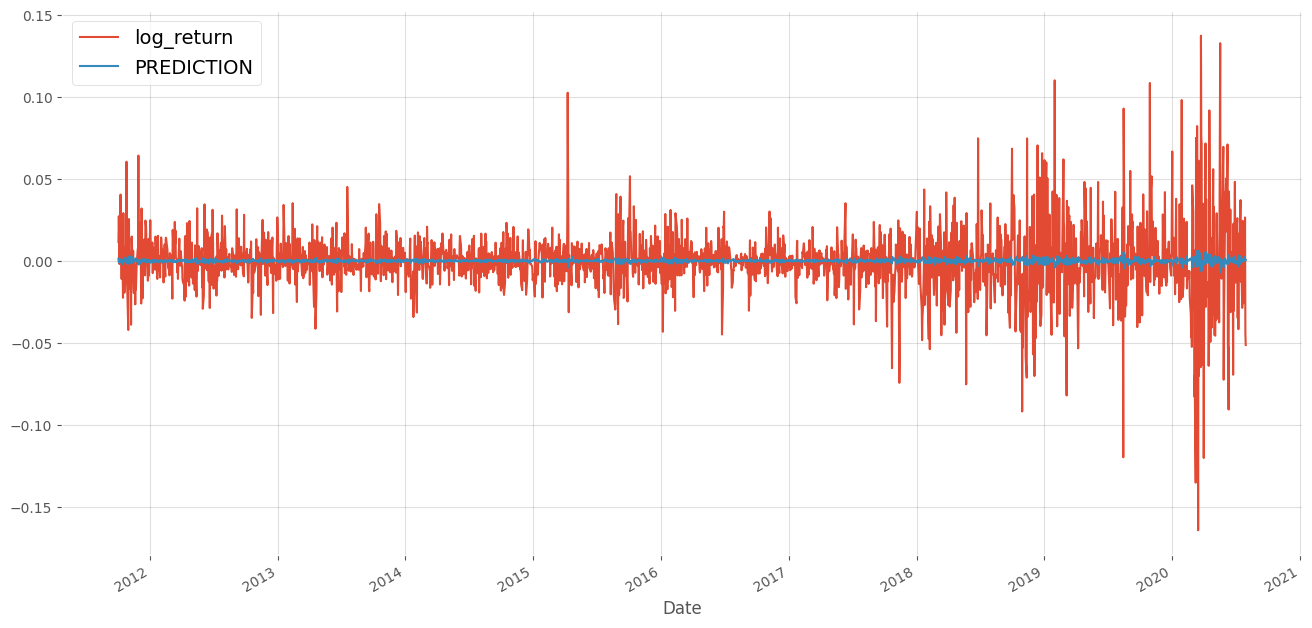

In [27]:
GE \
    [["log_return", "PREDICTION"]] \
    .iloc[LAG: ] \
    .plot(figsize = (16, 8)
         )

###  <font color = blue> 👉 Question 6. </font> Now, let's define performance metrics for accuracy.

### In Chapter 4 of the Lesson 5 lecture note, we calculated accuracy with the operational knowledge that, while it's theoretically possible for both returns and predictions to be positive, negative, or zero, only returns contained zero values. Predictions, on the other hand, did not include zeros; as a result, we considered them invalid predictions rather than irrelevant.

### Below, you will find two prototype functions (namely, `calculate_accuracy_A` and `calculate_accuracy_B`) that you can adapt for accuracy calculations. Please evaluate both functions and decide which one you prefer to use as a prototype for your work. Subsequently, explain why you favor the specific function for assessing accuracy.

### Then, using the chosen prototype of function, revise it and execute to assess the accuracy of the predictions obtained from the above lags approaches.

In [28]:
def calculate_accuracy_A(returns, predictions):

    # Ensure returns and predictions have the same length
    assert len(returns) == len(predictions), "Returns and predictions must have the same length."

    # Initialize variables for valid and total predictions
    valid_predictions = 0
    total_predictions = len(returns)

    # Loop through each data point
    for i in range(total_predictions):
        # Check if the return is zero (valid) and the prediction is not zero (invalid)
        if returns[i] == 0 and predictions[i] != 0:
            valid_predictions += 1
        # Check if the return is not zero and the prediction matches closely (within a tolerance, if needed)
        elif returns[i] != 0 and abs(returns[i] - predictions[i]) < tolerance:
            valid_predictions += 1

    # Calculate accuracy
    accuracy_A = valid_predictions / total_predictions

    return accuracy_A

In [29]:
def calculate_accuracy_B(returns_series, predictions_series):
    
    # Correct predictions
    correct_positive = (returns_series > 0) & (predictions_series > 0)
    correct_negative = (returns_series < 0) & (predictions_series < 0)
    correct_zero = (returns_series == 0) & (predictions_series == 0)

    total_correct = correct_positive.sum() + correct_negative.sum() + correct_zero.sum()

    # Incorrect predictions
    incorrect_positive_return = (returns_series > 0) & (predictions_series <= 0)
    incorrect_negative_return = (returns_series < 0) & (predictions_series >= 0)
    incorrect_zero_return = (returns_series == 0) & (predictions_series != 0)

    total_incorrect =\
    (
        incorrect_positive_return.sum()
        + incorrect_negative_return.sum()
        + incorrect_zero_return.sum()
    )

    # Calculate Hit
    accuracy_B = total_correct / (total_correct + total_incorrect)
    
    print(f'correct prediction: {total_correct}')
    print(f'wrong prediction: {total_incorrect}')
    return accuracy_B

### Below are the lines of code that lead to an answer:

In [30]:
GE['lag_3'] = GE['log_return'].shift(3)
GE = GE.dropna()
# GE

In [31]:
accuracy_3 =\
   calculate_accuracy_B(GE['lag_3'], GE['PREDICTION'])
accuracy_3

correct prediction: 1112
wrong prediction: 1127


0.4966502903081733

In [32]:
accuracy_10 =\
   calculate_accuracy_B(GE['lag_10'], GE['PREDICTION'])
accuracy_10

correct prediction: 1411
wrong prediction: 828


0.6301920500223314

In [33]:
accuracy_22 =\
   calculate_accuracy_B(GE['lag_22'], GE['PREDICTION'])
accuracy_22

correct prediction: 825
wrong prediction: 1414


0.3684680661009379

### <font color = red> Answer 6 </font>
    The prediction is __1080___ times correct and _1027____ wrong. The accuracy is __51.2577____ % with a 3-day lag.
    
    The prediction is __1273___ times correct and _834____ wrong. The accuracy is __60.4177____ % with a 10-day lag.
    
    The prediction is __670___ times correct and _1437____ wrong. The accuracy is _31.7988_____ % with a 22-day lag.
    

###  <font color = blue> 👉 Question 7. </font> Please calculate the Sharpe Ratio of the strategies for  `GE`.

### Below are the lines of code that lead to an answer:

In [34]:
R_f = 0.01 / 252

In [35]:
Sharpe_3 =\
(
    (
     GE['lag_3'].mean() - R_f 
     / 
     GE['lag_3'].std()
    ) * np.sqrt(252)
)
Sharpe_3

-0.03769167710110113

In [36]:
Sharpe_10 =\
(
    (
     GE['lag_10'].mean() - R_f 
     / 
     GE['lag_10'].std()
    ) * np.sqrt(252)
)
Sharpe_10

-0.036801143488733305

In [37]:
Sharpe_22 =\
(
    (
     GE['lag_22'].mean() - R_f 
     / 
     GE['lag_22'].std()
    ) * np.sqrt(252)
)
Sharpe_22

-0.03751885011573213

### <font color = red> Answer 7 </font>

    The strategy for GE with a 3-day lag leads to a Sharpe ratio of __-0.03955287413827975_____ .
    
    The strategy for GE with a 10-day lag leads to a Sharpe ratio of _-0.03851578304139239_______ .
        
    The strategy for GE with a 22-day lag leads to a Sharpe ratio of __-0.03913408832002233_____ .

## 👇 Questions 8 to 10 ask you to build, execute, and backtest a momentum strategy.

###  <font color = blue> 👉 Question 8. </font> Our securities of interest are Goldman Sachs (`GS`) and JP Morgan Chase (`JPM`) stock. The time period for analysis is from November 2013 to October 2021.

### Here’s our use of the momentum indicator, reflecting the moving averages of stock prices for trend following.

### The two moving windows are 24 days and 58 days.

### Calculate and visualize the maximum drawdowns and the longest drawdown periods for `GS` and `JPM`.

### Below are the lines of code that lead to an answer:

In [57]:
tickers = ["GS", "JPM"]

In [58]:
data = \
    yf\
    .download(tickers,
              start = '2013-11-01',
              end = '2021-10-31')

[*********************100%%**********************]  2 of 2 completed


In [59]:
data['GS'] = data['Adj Close', 'GS']
data['JPM'] = data['Adj Close', 'JPM']

In [60]:
data['GS_24'] = data['GS'].rolling(window=24).mean()
data['GS_58'] = data['GS'].rolling(window=58).mean()
data['JPM_24'] = data['JPM'].rolling(window=24).mean()
data['JPM_58'] = data['JPM'].rolling(window=58).mean()

In [61]:
data['GS_peak'] = data['GS'].cummax()
data['GS_drawdown'] = (data['GS'] - data['GS_peak']) / data['GS_peak']
data['JPM_peak'] = data['JPM'].cummax()
data['JPM_drawdown'] = (data['JPM'] - data['JPM_peak']) / data['JPM_peak']


In [62]:
max_drawdown_GS = data['GS_drawdown'].min()
max_drawdown_JPM = data['JPM_drawdown'].min()

In [63]:
max_drawdown_GS

-0.48748786217322426

In [64]:
max_drawdown_JPM

-0.4362650265606648

In [65]:
data['GS_recovery'] = data['GS'] >= data['GS_peak']
GS_drawdown_periods = data['GS_recovery'].astype(int).diff().fillna(0)
longest_drawdown_GS = GS_drawdown_periods[GS_drawdown_periods == 0].groupby((GS_drawdown_periods != 0).cumsum()).size().max()

data['JPM_recovery'] = data['JPM'] >= data['JPM_peak']
JPM_drawdown_periods = data['JPM_recovery'].astype(int).diff().fillna(0)
longest_drawdown_JPM = JPM_drawdown_periods[JPM_drawdown_periods == 0].groupby((JPM_drawdown_periods != 0).cumsum()).size().max()


In [66]:
longest_drawdown_GS

703

In [67]:
longest_drawdown_JPM

303

### <font color = red> Answer 8 (`visualization component`) is presented in the cell below: </font>

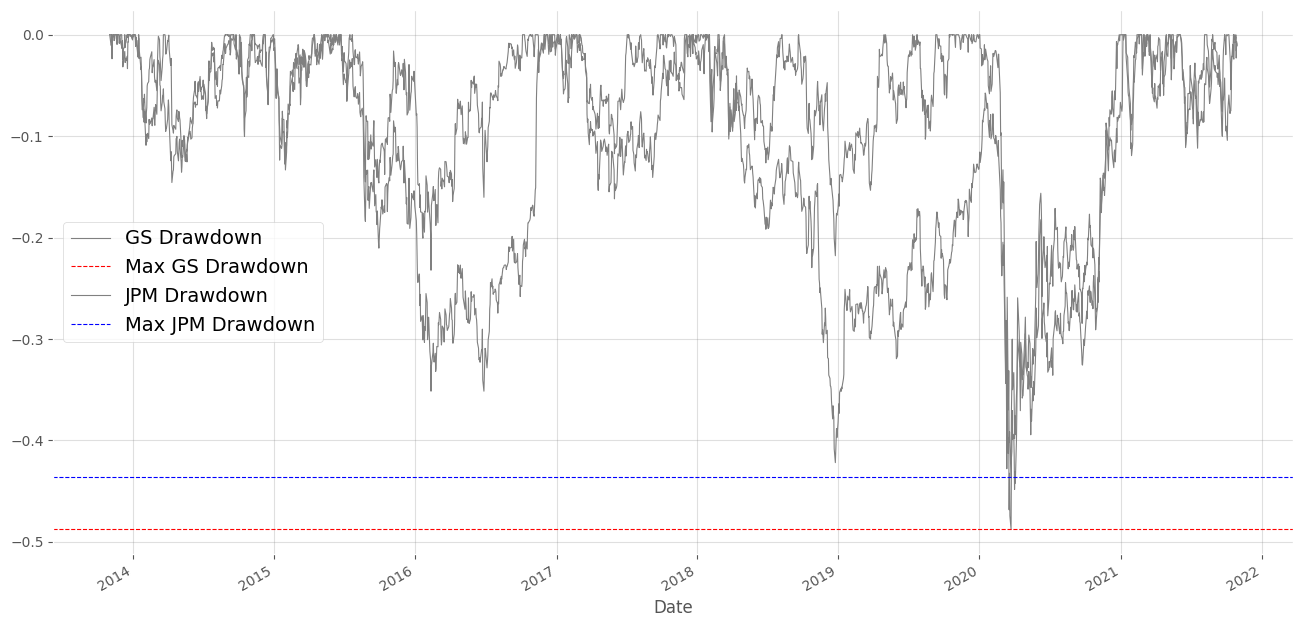

In [68]:
fig = plt.figure(figsize = [16, 8]
                )

data['GS_drawdown'].plot(color = "grey",
                         linewidth = 0.80,
                         label="GS Drawdown")

plt.axhline(y=data['GS_drawdown'].min(), color="red", lw=0.80, linestyle="--", label="Max GS Drawdown")

data['JPM_drawdown'].plot(color="grey", 
                          linewidth=0.80, 
                          label="JPM Drawdown")

plt.axhline(y=data['JPM_drawdown'].min(), color="blue", lw=0.80, linestyle="--", label="Max JPM Drawdown")

plt.legend()
plt.show()

### <font color = red> Answer 8 </font>
    
    As to GS,
    
    The maximum drawdown is about ___-0.48748786217322426______ percentage points.
    The longest drawdown period lasts for _____703________ days.
    
    As to JPM,
    
    The maximum drawdown is about ___-0.4362650265606648_________ percentage points.
    The longest drawdown period lasts for ______303_______ days.
    

###  <font color = blue> 👉 Question 9. </font>  If you had started with a capital of $300,000 for each of the three securities, how much would be left in your account after trading according to your above strategies for `GS` and `JPM`?

### Below are the lines of code that lead to an answer:

In [70]:
Capital = 3e5
Capital

300000.0

In [72]:
data['GS_returns'] = data['GS'].pct_change()
data['JPM_returns'] = data['JPM'].pct_change()
data

Price        Adj Close                   Close                    High  \
Ticker              GS         JPM          GS         JPM          GS   
Date                                                                     
2013-11-01  131.497940   38.793076  162.050003   52.509998  162.600006   
2013-11-04  132.398712   38.445843  163.160004   52.040001  163.240005   
2013-11-05  131.416779   38.379364  161.949997   51.950001  162.630005   
2013-11-06  132.690796   38.490173  163.520004   52.099998  164.300003   
2013-11-07  129.542328   38.157742  159.639999   51.650002  164.210007   
...                ...         ...         ...         ...         ...   
2021-10-25  382.288788  157.160233  414.750000  170.940002  419.489990   
2021-10-26  384.924896  157.583160  417.609985  171.399994  419.809998   
2021-10-27  378.823029  154.300919  410.989990  167.830002  418.059998   
2021-10-28  382.353302  156.626999  414.820007  170.360001  414.920013   
2021-10-29  380.998322  156.194885  413.350006  169.889999  415.959991   

Price                          Low                    Open              ...  \
Ticker             JPM          GS         JPM          GS         JPM  ...   
Date                                                                    ...   
2013-11-01   52.709999  160.720001   51.299999  161.029999   51.450001  ...   
2013-11-04   52.759998  161.589996   52.000000  162.419998   52.740002  ...   
2013-11-05   52.130001  160.779999   51.660000  161.669998   51.849998  ...   
2013-11-06   52.340000  162.330002   51.830002  162.529999   52.259998  ...   
2013-11-07   52.340000  159.610001   51.580002  164.039993   52.130001  ...   
...                ...         ...         ...         ...         ...  ...   
2021-10-25  172.960007  413.269989  170.479996  416.209991  172.710007  ...   
2021-10-26  172.490005  413.760010  170.539993  416.369995  171.000000  ...   
2021-10-27  170.699997  410.549988  167.339996  416.549988  170.320007  ...   
2021-10-28  170.509995  409.059998  167.960007  412.000000  168.300003  ...   
2021-10-29  172.240005  411.179993  169.389999  414.019989  171.179993  ...   

Price           JPM_24      JPM_58     GS_peak GS_drawdown    JPM_peak  \
Ticker                                                                   
Date                                                                     
2013-11-01         NaN         NaN  131.497940    0.000000   38.793076   
2013-11-04         NaN         NaN  132.398712    0.000000   38.793076   
2013-11-05         NaN         NaN  132.398712   -0.007416   38.793076   
2013-11-06         NaN         NaN  132.690796    0.000000   38.793076   
2013-11-07         NaN         NaN  132.690796   -0.023728   38.793076   
...                ...         ...         ...         ...         ...   
2021-10-25  152.745403  147.867282  384.971558   -0.006969  157.932541   
2021-10-26  153.374566  148.201209  384.971558   -0.000121  157.932541   
2021-10-27  153.666296  148.448450  384.971558   -0.015971  157.932541   
2021-10-28  153.984119  148.667255  384.971558   -0.006801  157.932541   
2021-10-29  154.133910  148.881288  384.971558   -0.010321  157.932541   

Price      JPM_drawdown GS_recovery JPM_recovery GS_returns JPM_returns  
Ticker                                                                   
Date                                                                     
2013-11-01     0.000000        True         True        NaN         NaN  
2013-11-04    -0.008951        True        False   0.006850   -0.008951  
2013-11-05    -0.010665       False        False  -0.007416   -0.001729  
2013-11-06    -0.007808        True        False   0.009694    0.002887  
2013-11-07    -0.016378       False        False  -0.023728   -0.008637  
...                 ...         ...          ...        ...         ...  
2021-10-25    -0.004890       False        False   0.001038   -0.004890  
2021-10-26    -0.002212       False        False   0.006896    0.002691  
2021-

In [76]:
data['GSposition'] = \
(   np\
    .where(data['GS_24'] > data['GS_58'],
           1, 0)

)

data['GSposition']

Date
2013-11-01    0
2013-11-04    0
2013-11-05    0
2013-11-06    0
2013-11-07    0
             ..
2021-10-25    0
2021-10-26    0
2021-10-27    0
2021-10-28    0
2021-10-29    0
Name: GSposition, Length: 2013, dtype: int64

In [77]:
data['JPMposition'] = \
(   np\
    .where(data['JPM_24'] > data['JPM_58'],
           1, 0)

)

data['JPMposition']

Date
2013-11-01    0
2013-11-04    0
2013-11-05    0
2013-11-06    0
2013-11-07    0
             ..
2021-10-25    1
2021-10-26    1
2021-10-27    1
2021-10-28    1
2021-10-29    1
Name: JPMposition, Length: 2013, dtype: int64

In [78]:
data['GS_strategy_returns'] = \
    data['GSposition']\
    .shift(1)\
    * data['GS_returns']

data['JPM_strategy_returns'] = \
    data['JPMposition']\
    .shift(1) \
    * data['JPM_returns']

In [79]:
data['GS_cumulative_returns'] = (1 + data['GS_strategy_returns']).cumprod()
data['JPM_cumulative_returns'] = (1 + data['JPM_strategy_returns']).cumprod()

In [82]:
final_GS_value = Capital * data['GS_cumulative_returns'].iloc[-1]
final_JPM_value = Capital * data['JPM_cumulative_returns'].iloc[-1]
final_GS_value

807527.2776212863

In [83]:
final_JPM_value

733706.5235496478

### <font color = red> Answer 9 </font>

    The answer is ______GS：807527.2776212863_______JPM:__733706.5235496478_________ .

###  <font color = blue> 👉 Question 10. </font> Using the current momentum strategy, how many trading opportunities were there for GS and JPM?

### Below are the lines of code that lead to an answer:

In [87]:
data['GS_BUYor_SELL'] =\
(
    np
    .where(data['GS_24'] > data['GS_58'],
           1.0, 0.0
          )
)

# data['GS_BUYor_SELL']

In [86]:
data['JPM_BUYor_SELL'] =\
(
    np
    .where(data['JPM_24'] > data['JPM_58'],
           1.0, 0.0
          )
)

data

Price        Adj Close                   Close                    High  \
Ticker              GS         JPM          GS         JPM          GS   
Date                                                                     
2013-11-01  131.497940   38.793076  162.050003   52.509998  162.600006   
2013-11-04  132.398712   38.445843  163.160004   52.040001  163.240005   
2013-11-05  131.416779   38.379364  161.949997   51.950001  162.630005   
2013-11-06  132.690796   38.490173  163.520004   52.099998  164.300003   
2013-11-07  129.542328   38.157742  159.639999   51.650002  164.210007   
...                ...         ...         ...         ...         ...   
2021-10-25  382.288788  157.160233  414.750000  170.940002  419.489990   
2021-10-26  384.924896  157.583160  417.609985  171.399994  419.809998   
2021-10-27  378.823029  154.300919  410.989990  167.830002  418.059998   
2021-10-28  382.353302  156.626999  414.820007  170.360001  414.920013   
2021-10-29  380.998322  156.194885  413.350006  169.889999  415.959991   

Price                          Low                    Open              ...  \
Ticker             JPM          GS         JPM          GS         JPM  ...   
Date                                                                    ...   
2013-11-01   52.709999  160.720001   51.299999  161.029999   51.450001  ...   
2013-11-04   52.759998  161.589996   52.000000  162.419998   52.740002  ...   
2013-11-05   52.130001  160.779999   51.660000  161.669998   51.849998  ...   
2013-11-06   52.340000  162.330002   51.830002  162.529999   52.259998  ...   
2013-11-07   52.340000  159.610001   51.580002  164.039993   52.130001  ...   
...                ...         ...         ...         ...         ...  ...   
2021-10-25  172.960007  413.269989  170.479996  416.209991  172.710007  ...   
2021-10-26  172.490005  413.760010  170.539993  416.369995  171.000000  ...   
2021-10-27  170.699997  410.549988  167.339996  416.549988  170.320007  ...   
2021-10-28  170.509995  409.059998  167.960007  412.000000  168.300003  ...   
2021-10-29  172.240005  411.179993  169.389999  414.019989  171.179993  ...   

Price      GS_returns JPM_returns GSposition JPMposition GS_strategy_returns  \
Ticker                                                                         
Date                                                                           
2013-11-01        NaN         NaN          0           0                 NaN   
2013-11-04   0.006850   -0.008951          0           0                 0.0   
2013-11-05  -0.007416   -0.001729          0           0                -0.0   
2013-11-06   0.009694    0.002887          0           0                 0.0   
2013-11-07  -0.023728   -0.008637          0           0                -0.0   
...               ...         ...        ...         ...                 ...   
2021-10-25   0.001038   -0.004890          0           1                 0.0   
2021-10-26   0.006896    0.002691          0           1                 0.0   
2021-10-27  -0.015852   -0.020829          0           1                -0.0   
2021-10-28   0.009319    0.015075          0           1                 0.0   
2021-10-29  -0.003544   -0.002759          0           1                -0.0   

Price      JPM_strategy_returns GS_cumulative_returns JPM_cumulative_returns  \
Ticker                                                                         
Date                                                                           
2013-11-01                  NaN                   NaN                    NaN   
2013-11-04            -0.000000              1.000000               1.000000   
2013-11-05            -0.000000              1.000000               1.000000   
2013-11-06             0.000000              1.000000               1.000000   
2013-11-07            -0.000000              1.000000               1.000000   
...                         ...                   ...                    ...   
2021-10-25     

In [93]:
data['GSposition'] =\
(
    data["GS_BUYor_SELL"]
    .diff()
)

data['JPMposition'] =\
(
    data["JPM_BUYor_SELL"]
    .diff()
)


In [95]:
GS_trading_opp = data['GSposition'].diff().abs().sum()
JPM_trading_opp = data['JPMposition'].diff().abs().sum()
GS_trading_opp

76.0

In [96]:
JPM_trading_opp 

90.0

### <font color = red> Answer 10 </font>

    The answer is the trading opportunities of GS are 76, and the trading opportunities of JPM are 90.

> 💯 “Thank you for putting your efforts into the individual assessment questions” 😊